<a href="https://colab.research.google.com/github/2303A52357/AIML_2303A52357/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

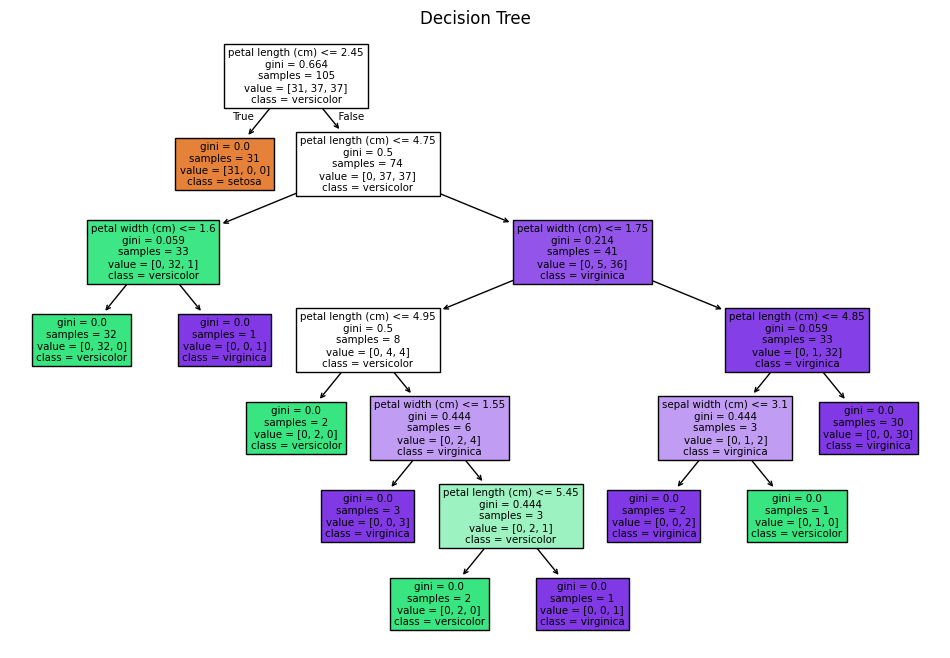

In [5]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree")
plt.show()

In [6]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy (without pruning): {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy (without pruning): 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
pruned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

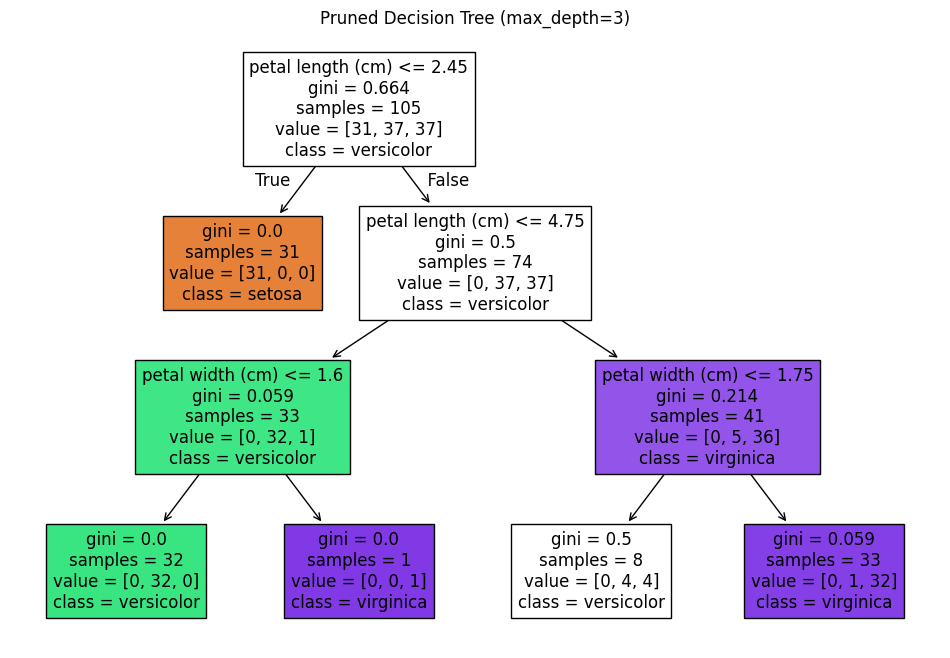

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(pruned_dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()


In [9]:
y_pruned_pred = pruned_dt.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
pruned_conf_matrix = confusion_matrix(y_test, y_pruned_pred)
print(f"Accuracy (with pruning): {pruned_accuracy:.2f}")
print("\nPruned Confusion Matrix:")
print(pruned_conf_matrix)
print("\nClassification Report (Pruned):")
print(classification_report(y_test, y_pruned_pred))

Accuracy (with pruning): 1.00

Pruned Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (Pruned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
feature_importances = pruned_dt.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
             Feature  Importance
2  petal length (cm)    0.925108
3   petal width (cm)    0.074892
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


In [11]:
print("\nComparison of Models:")
print(f"Accuracy without pruning: {accuracy:.2f}")
print(f"Accuracy with pruning: {pruned_accuracy:.2f}")


Comparison of Models:
Accuracy without pruning: 1.00
Accuracy with pruning: 1.00
